In [71]:
#Import libraries
import pandas as pd
import numpy as np
import shutil, os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [74]:
# Define folders and load mapping.csv file
origin = 'C:/Users/danie/Documents/FTDS/Capstone/1. Webscraping/Output/'
destination = 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/'
mapping = pd.read_csv('mapping.csv')
mapping.set_index('Original', inplace = True) # set index, so we can use .loc[] function
mapping.head()

,Combined
Original,
Blazers,Jackets & Coats
Brooks-MensPants,Trousers
Brooks-MensShorts,Shorts
Brooks-MensSuits,Suits
Brooks-WomenDresses,Dresses


In [75]:
#Check mapping clothing categories
mapping['Combined'].unique()

array(['Jackets & Coats', 'Trousers', 'Shorts', 'Suits', 'Dresses',
       'Jumpers', 'Skirts', 'Blouses', 'Shirts', 'T-Shirts', 'Jeans',
       'Polos', 'Accessories', 'Shoes'], dtype=object)

In [76]:
#Loop through folder and store original clothing categories
# Use to check against mapping.csv
def clothing_folder_list(origin):
    folders = []
    for brand in os.listdir(origin): # loop through folder for each shop/brand
        for category in os.listdir(origin + brand): # loop through each category within a shop/brand
            if category not in folders:
                folders.append(category)
    folders = sorted(folders)
    return folders

In [77]:
#Run if you need mapping categories
# clothing_folder_list(origin)

In [78]:
#Define function to create empty folders
def create_category_folders(destination, mapping):
    for category in mapping['Combined'].unique():
        try:
            os.mkdir(os.path.join(destination, category))
        except:
            pass

In [ ]:
#Define function to loop through shop and category combinations
# Save all images in folders to corresponding folder based on mapping table
def copy_files(origin, destination, mapping):
    failed = []
    for brand in os.listdir(origin): # loop through folder for each shop/brand
        for category in os.listdir(origin + brand): # loop through each category within a shop/brand
            try:
                src = origin + brand + '/' + category
                dst = destination + mapping['Combined'].loc[category]
                for file_name in os.listdir(src):
                    src_file = os.path.join(src, file_name)
                    dst_file = os.path.join(dst, file_name)
                    shutil.copy(src_file, dst_file)  
                print(f'Completed: {brand} {category}')
            except:
                print(f'Failed: {brand} {category}')
                failed.append(brand + ' ' + category)
                continue
    return failed

In [85]:
#Define function to loop through shop and category combinations
# Save all images in folders to corresponding folder based on mapping table
def copy_files_train_test_split(origin, destination, mapping):
    failed = []
    for brand in os.listdir(origin): # loop through folder for each shop/brand
        for category in os.listdir(origin + brand): # loop through each category within a shop/brand
            try:
                count = 1
                for file_name in os.listdir(origin + brand + '/' + category):
                    if count%5 == 0:
                        src = origin + brand + '/' + category
                        dst = destination + 'Test/' + mapping['Combined'].loc[category]
                        src_file = os.path.join(src, file_name)
                        dst_file = os.path.join(dst, file_name)
                        shutil.copy(src_file, dst_file)
                        count+=1  
                    else:
                        src = origin + brand + '/' + category
                        dst = destination + 'Train/' + mapping['Combined'].loc[category]
                        src_file = os.path.join(src, file_name)
                        dst_file = os.path.join(dst, file_name)
                        shutil.copy(src_file, dst_file)  
                        count+=1
                print(f'Completed: {brand} {category}')

            except:
                print(f'Failed: {brand} {category}')
                failed.append(brand + ' ' + category)
                continue
    return failed

In [88]:
#Create empty folders to transfer data into
create_category_folders(destination +'Train/', mapping)
create_category_folders(destination +'Test/', mapping)

In [89]:
#Copy files over based on the mapping table
failed = copy_files_train_test_split(origin, destination, mapping)

Completed: Adidas Mens Jackets
Completed: Adidas Mens Pants
Completed: Adidas Mens Polos
Completed: Adidas Mens Shorts
Completed: Adidas Mens Sweatshirts & Hoodies
Completed: Adidas Mens T-Shirts
Completed: Adidas Womens Dresses
Completed: Adidas Womens Jackets
Completed: Adidas Womens Pants
Completed: Adidas Womens Polos
Completed: Adidas Womens Shorts
Completed: Adidas Womens Skirts
Completed: Adidas Womens Sweatshirts & Hoodies
Completed: Adidas Womens T-Shirts
Completed: BrooksBrothers Brooks-MensPants
Completed: BrooksBrothers Brooks-MensShorts
Completed: BrooksBrothers Brooks-MensSuits
Completed: BrooksBrothers Brooks-WomenDresses
Completed: BrooksBrothers Brooks-WomenKnitwear
Completed: BrooksBrothers Brooks-WomenPants
Completed: BrooksBrothers Brooks-WomenSkirts
Completed: BrooksBrothers Brooks-WomensTops
Completed: CalvinKleinMen Mens Hoodies
Completed: CalvinKleinMen Mens Jackets
Completed: CalvinKleinMen Mens Jeans
Completed: CalvinKleinMen Mens Shirts
Completed: CalvinKlein

In [90]:
#Check if any folders failed to copy over
failed

[]

In [68]:
# Count number of images for each category
count = {}
for category in os.listdir(destination):
    count[category] = len([image for image in os.listdir(destination + category)])

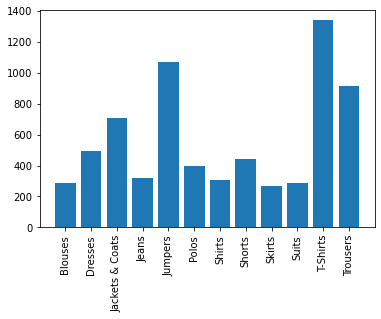

In [69]:
#Plot bar graph
plt.bar(count.keys(), count.values())
plt.xticks(rotation = 90)
plt.show()

In [70]:
count

{'Blouses': 290,
 'Dresses': 497,
 'Jackets & Coats': 705,
 'Jeans': 320,
 'Jumpers': 1069,
 'Polos': 396,
 'Shirts': 305,
 'Shorts': 441,
 'Skirts': 267,
 'Suits': 288,
 'T-Shirts': 1338,
 'Trousers': 913}